# Esfuerzo medio

In [3]:
import numpy as np
import math
from sklearn import linear_model
import matplotlib.pyplot as plt

In [50]:
#"""
#DATOS DE PROBLEMA inglesas
Su=110  #esfuerzo ultimo, en ksi
Sy=77 #esfuerzo de cedencia, en ksi
Snbend=37.174 #Maximo esfuerzo posible a 10^6, en caso de carga "flexion pura", ksi
Snaxial=33.044 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", ksi
Sntorsion=21.561 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion pura", ksi
cycles=60000.0 #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible
Scyclesbend=55.398 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "flexion pura", ksi
Scyclesaxial=47.965 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "axial pura", ksi
Scyclestorsion=36.627 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "torsion pura", ksi
casocarga='zero-to-maximum'
units='en'
#"""


"""
#DATOS DE PROBLEMA, ISO
Su=550 #esfuerzo ultimo, en MPa
Sy=462 #esfuerzo de cedencia, en MPa
Snbend=193.381 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "flexion pura", MPa
Snaxial=171.895 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", MPa
Sntorsion=112.161 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion", MPa
cycles=0 #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible
units=ISO
"""

'\n#DATOS DE PROBLEMA, ISO\nSu=550 #esfuerzo ultimo, en MPa\nSy=462 #esfuerzo de cedencia, en MPa\nSnbend=193.381 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "flexion pura", MPa\nSnaxial=171.895 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", MPa\nSntorsion=112.161 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion", MPa\ncycles=0 #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible\nunits=ISO\n'

In [51]:
#definicion de la funcion para encontrar raices
def find_roots(x,y):
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)
x=np.array([0,Sy,Su]) #valores de x

In [52]:
#definicion de la ecuacion para el caso de carga
if casocarga=='zero-to-maximum':
    Caso_eq=((Sy-0)/(Sy-0))*x #valores para el caso de carga

In [53]:
#CALCULATIONS
#BENDING
Sy_eq=((0-Sy)/(Sy-0))*x+Sy #valores para el esfuerzo de cedencia
Snbend_eq=((0-Snbend)/(Su-0))*x+Snbend #valores para flexion para vida infinita
Scyclesbend_eq=((0-Scyclesbend)/(Su-0))*x+Scyclesbend #valores para flexion, para N ciclos
z_Sy = find_roots(x,Caso_eq-Sy_eq)
z_Snbend = find_roots(x,Caso_eq-Snbend_eq)
z_Scyclesbend = find_roots(x,Caso_eq-Scyclesbend_eq)

#AXIAL
Sy_eq=((0-Sy)/(Sy-0))*x+Sy #valores para el esfuerzo de cedencia
Snaxial_eq=((0-Snaxial)/(Su-0))*x+Snaxial #valores para axial para vida infinita
Scyclesaxial_eq=((0-Scyclesaxial)/(Su-0))*x+Scyclesaxial #valores para axial, para N ciclos
z_Sy = find_roots(x,Caso_eq-Sy_eq)
z_Snaxial = find_roots(x,Caso_eq-Snaxial_eq)
z_Scyclesaxial = find_roots(x,Caso_eq-Scyclesaxial_eq)

#TORSION
Sus=.8*Su #ultimate shear strength, for steel (For other ductile metals use .7*Su)
Ssy=.58*Sy #Shear yield strength
Ssy_eq=((0-Ssy)/(Ssy-0))*x+Ssy #valores para el esfuerzo de cedencia
Sntorsion_eq=((0-Sntorsion)/(Sus-0))*x+Sntorsion #valores para torsion para vida infinita
Scyclestorsion_eq=((0-Scyclestorsion)/(Sus-0))*x+Scyclestorsion #valores para torsion, para N ciclos
z_Ssy = find_roots(x,Caso_eq-Ssy_eq)
z_Sntorsion = find_roots(x,Caso_eq-Sntorsion_eq)
z_Scyclestorsion = find_roots(x,Caso_eq-Scyclestorsion_eq)

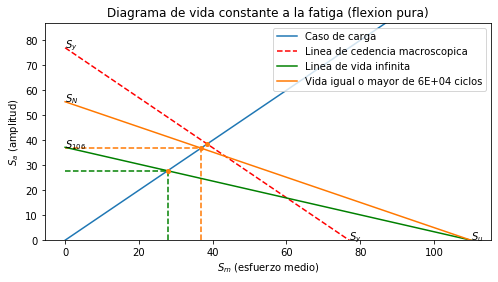

In [54]:
##BENDING PLOT
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(x,Caso_eq, label='Caso de carga')
plt.plot(x,Sy_eq,'--', label='Linea de cedencia macroscopica', color='r')
plt.plot(x,Snbend_eq, label='Linea de vida infinita', color='g')
if cycles>0:
    plt.plot(x,Scyclesbend_eq, label='Vida igual o mayor de {0:.0E} ciclos'.format(cycles), color='#FF7800')
    plt.plot(z_Scyclesbend, np.interp(z_Scyclesbend, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Sy, np.interp(z_Sy, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Snbend, np.interp(z_Snbend, x, Caso_eq), marker="o", ls="", ms=4, color="C1")

plt.title('Diagrama de vida constante a la fatiga (flexion pura)')
plt.xlabel('$S_m$ (esfuerzo medio)')
plt.ylabel('$S_a$ (amplitud)')
plt.legend(loc='upper right')
plt.ylim(0,Sy+10)
ax.text(0,Snbend,'$S_{106}$')
ax.text(0,Scyclesbend,'$S_{N}$')
ax.text(0,Sy,'$S_{y}$')
ax.text(Su,0,'$S_{u}$')
ax.text(Sy,0,'$S_{y}$')

ax.hlines(y=z_Snbend[0], xmin=x[0], xmax=z_Snbend[0], color='g', linestyles='--')
ax.vlines(x=z_Snbend[0], ymin=x[0], ymax=z_Snbend[0], color='g', linestyles='--')
ax.hlines(y=z_Scyclesbend[0], xmin=x[0], xmax=z_Scyclesbend[0], color='#FF7800', linestyles='--')
ax.vlines(x=z_Scyclesbend[0], ymin=x[0], ymax=z_Scyclesbend[0], color='#FF7800', linestyles='--')

In [55]:
if casocarga=='zero-to-maximum':
    print('Sy={}'.format(Sy))
    print('SN={}'.format(Scyclesbend))
    print('Sa para {} ciclos ={}'.format(cycles,z_Scyclesbend[0]))
    print('Sn={}'.format(Snbend))
    print('Sa para Sn (10e6) ciclos={}'.format(z_Snbend[0]))
    print('Su={}'.format(Su))
    print('Max allowed stress for infinite life = Sm + Sa = {}'.format(z_Snbend[0]*2))
    print('Max allowed stress for {} cycles = Sm + Sa = {}'.format(cycles,z_Scyclesbend[0]*2))

Sy=77
SN=55.398
Sa para 60000.0 ciclos =36.84312990483561
Sn=37.174
Sa para Sn (10e6) ciclos=27.78439126476144
Su=110
Max allowed stress for infinite life = Sm + Sa = 55.56878252952288
Max allowed stress for 60000.0 cycles = Sm + Sa = 73.68625980967121


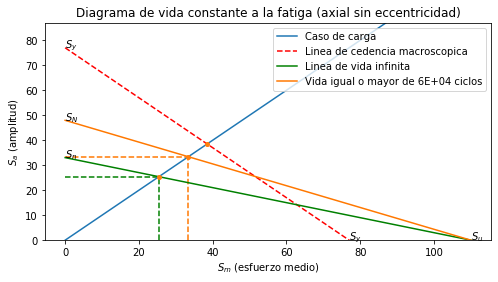

In [56]:
##AXIAL PLOT
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(x,Caso_eq, label='Caso de carga')
plt.plot(x,Sy_eq,'--', label='Linea de cedencia macroscopica', color='r')
plt.plot(x,Snaxial_eq, label='Linea de vida infinita', color = 'g')
if cycles>0:
    plt.plot(x,Scyclesaxial_eq, label='Vida igual o mayor de {0:.0E} ciclos'.format(cycles), color = '#FF7800')
    plt.plot(z_Scyclesaxial, np.interp(z_Scyclesaxial, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Sy, np.interp(z_Sy, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Snaxial, np.interp(z_Snaxial, x, Caso_eq), marker="o", ls="", ms=4, color="C1")

plt.title('Diagrama de vida constante a la fatiga (axial sin eccentricidad)')
plt.xlabel('$S_m$ (esfuerzo medio)')
plt.ylabel('$S_a$ (amplitud)')
plt.legend(loc='upper right')
plt.ylim(0,Sy+10)
ax.text(0,Snaxial,'$S_{n}$')
ax.text(0,Scyclesaxial,'$S_{N}$')
ax.text(0,Sy,'$S_{y}$')
ax.text(Su,0,'$S_{u}$')
ax.text(Sy,0,'$S_{y}$')

ax.hlines(y=z_Snaxial[0], xmin=x[0], xmax=z_Snaxial[0], color='g', linestyles='--')
ax.vlines(x=z_Snaxial[0], ymin=x[0], ymax=z_Snaxial[0], color='g', linestyles='--')
ax.hlines(y=z_Scyclesaxial[0], xmin=x[0], xmax=z_Scyclesaxial[0], color='#FF7800', linestyles='--')
ax.vlines(x=z_Scyclesaxial[0], ymin=x[0], ymax=z_Scyclesaxial[0], color='#FF7800', linestyles='--')

In [60]:
if casocarga=='zero-to-maximum':
    print('Sy={}'.format(Sy))
    print('SN={}'.format(Scyclesaxial))
    print('Sa para {} ciclos ={}'.format(cycles,z_Scyclesaxial[0]))
    print('Sn={}'.format(Snaxial))
    print('Sa para Sn (10e6) ciclos={}'.format(z_Snaxial[0]))
    print('Su={}'.format(Su))
    print('Max allowed stress for infinite life = Sm + Sa = {}'.format(z_Snaxial[0]*2))
    print('Max allowed stress for {} cycles = Sm + Sa = {}'.format(cycles,z_Scyclesaxial[0]*2))

Sy=77
SN=47.965
Sa para 60000.0 ciclos =33.40075333143418
Sn=33.044
Sa para Sn (10e6) ciclos=25.410642879114118
Su=110
Max allowed stress for infinite life = Sm + Sa = 50.821285758228235
Max allowed stress for 60000.0 cycles = Sm + Sa = 66.80150666286836


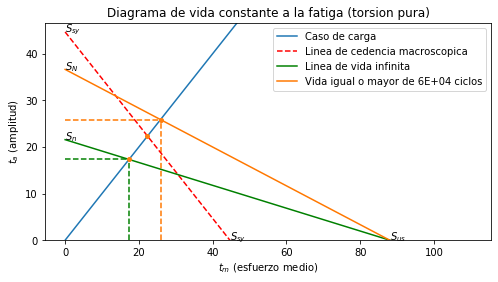

In [59]:
##TORSION PLOT
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(x,Caso_eq, label='Caso de carga')
plt.plot(x,Ssy_eq,'--', label='Linea de cedencia macroscopica', color='r')
plt.plot(x,Sntorsion_eq, label='Linea de vida infinita', color='g')
if cycles>0:
    plt.plot(x,Scyclestorsion_eq, label='Vida igual o mayor de {0:.0E} ciclos'.format(cycles), color='#FF7800')
    plt.plot(z_Scyclestorsion, np.interp(z_Scyclestorsion, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Ssy, np.interp(z_Ssy, x, Caso_eq), marker="o", ls="", ms=4, color="C1")
plt.plot(z_Sntorsion, np.interp(z_Sntorsion, x, Caso_eq), marker="o", ls="", ms=4, color="C1")

plt.title('Diagrama de vida constante a la fatiga (torsion pura)')
plt.xlabel('$t_m$ (esfuerzo medio)')
plt.ylabel('$t_a$ (amplitud)')
plt.legend(loc='upper right')
plt.ylim(0,Scyclestorsion+10)
ax.text(0,Sntorsion,'$S_{n}$')
ax.text(0,Scyclestorsion,'$S_{N}$')
ax.text(0,Ssy,'$S_{sy}$')
ax.text(Sus,0,'$S_{us}$')
ax.text(Ssy,0,'$S_{sy}$')

ax.hlines(y=z_Sntorsion[0], xmin=x[0], xmax=z_Sntorsion[0], color='g', linestyles='--')
ax.vlines(x=z_Sntorsion[0], ymin=x[0], ymax=z_Sntorsion[0], color='g', linestyles='--')
ax.hlines(y=z_Scyclestorsion[0], xmin=x[0], xmax=z_Scyclestorsion[0], color='#FF7800', linestyles='--')
ax.vlines(x=z_Scyclestorsion[0], ymin=x[0], ymax=z_Scyclestorsion[0], color='#FF7800', linestyles='--')

In [62]:
if casocarga=='zero-to-maximum':
    print('Ssy={}'.format(Ssy))
    print('SN={}'.format(Scyclestorsion))
    print('Sa para {} ciclos ={}'.format(cycles,z_Scyclestorsion[0]))
    print('Sn={}'.format(Sntorsion))
    print('Sa para Sn (10e6) ciclos={}'.format(z_Sntorsion[0]))
    print('Su={}'.format(Su))
    print('Max allowed stress for infinite life = Sm + Sa = {}'.format(z_Sntorsion[0]*2))
    print('Max allowed stress for {} cycles = Sm + Sa = {}'.format(cycles,z_Scyclestorsion[0]*2))

Ssy=44.66
SN=36.627
Sa para 60000.0 ciclos =25.862581944522454
Sn=21.561
Sa para Sn (10e6) ciclos=17.317914221301375
Su=110
Max allowed stress for infinite life = Sm + Sa = 34.63582844260275
Max allowed stress for 60000.0 cycles = Sm + Sa = 51.72516388904491
